# Minha primeira rede neural artificial 

### Donwload dataset

https://www.kaggle.com/tongpython/cat-and-dog/downloads/cat-and-dog.zip/1

## Instalando tensorflow e keras

![title](img/tensor_keras.png)

## Dataset


 <img src="img/data.jpeg" alt="Drawing" style="width: 600px;"/>


## Importando as bibliotecas necessárias

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from matplotlib import pyplot
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Arquitetura da rede

### Classic VGG model 


![title](img/cnn.jpeg)

In [7]:
# Initialising the CNN
classifier = Sequential()
# https://keras.io/models/sequential/

## Convolução


![title](img/convolucao.gif)

In [8]:
#1º camada
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# 2º camada
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))


## Pooling
### Max Pooling

<img src="img/max-pooling.png" alt="Drawing" style="width: 500px;"/>


In [9]:
classifier.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

## Função de ativação


Função de ativação é uma função utilizada para se obter a saída do nó. É usado para determinar a saída da rede neural como sim ou não. Ele mapeia os valores resultantes entre 0 a 1 ou -1 a 1 etc. (dependendo da função)

![title](img/funcao_ativacao.png)

In [10]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total para

In [11]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mae', 'acc'])


## Data augmentation

<img src="img/data_augmentation.png" alt="Drawing" style="width: 500px;"/>


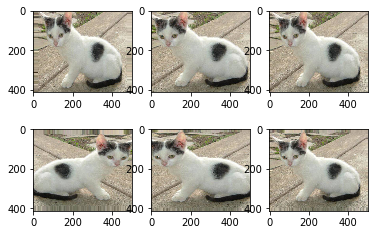

In [14]:

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

img = load_img('dataset/training_set/cats/cat.3.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in train_datagen.flow(x, batch_size=1,
                          save_to_dir='preview', save_prefix='cat', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

plt.figure()
for i, file in enumerate(os.listdir('preview')[0:6]):
    fullpath = 'preview'+ "\\" + file
    #print(fullpath)
    img=mpimg.imread(fullpath)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)

## Treinamento

In [18]:
batch_size = 32
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')


Found 8000 images belonging to 2 classes.


## Teste

In [19]:

test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = batch_size,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


# O que é "generator"?

"Generator" é usado quando se tem datasets grandes e deseja-se remover dados duplicados.
Sem o "generator" seria necessário colocar todos os dados em um numpy array. 

<img src="img/generator.png" alt="Drawing" style="width: 500px;"/>



## Fit

In [21]:

model_fit = classifier.fit_generator(training_set,
                         steps_per_epoch = 1000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 300,
                        callbacks=[ModelCheckpoint('checkpoints', monitor='val_acc', save_best_only=True)])


Epoch 1/10
1000/1000 [==============================] - 848s 848ms/step - loss: 0.5825 - mean_absolute_error: 0.4013 - acc: 0.6897 - val_loss: 0.5654 - val_mean_absolute_error: 0.3486 - val_acc: 0.7114
Epoch 2/10
1000/1000 [==============================] - 742s 742ms/step - loss: 0.4819 - mean_absolute_error: 0.3195 - acc: 0.7661 - val_loss: 0.4687 - val_mean_absolute_error: 0.3013 - val_acc: 0.7804
Epoch 3/10
1000/1000 [==============================] - 741s 741ms/step - loss: 0.4411 - mean_absolute_error: 0.2894 - acc: 0.7910 - val_loss: 0.4731 - val_mean_absolute_error: 0.2718 - val_acc: 0.7864
Epoch 4/10
1000/1000 [==============================] - 738s 738ms/step - loss: 0.4035 - mean_absolute_error: 0.2620 - acc: 0.8132 - val_loss: 0.4541 - val_mean_absolute_error: 0.2657 - val_acc: 0.7972
Epoch 5/10
1000/1000 [==============================] - 742s 742ms/step - loss: 0.3734 - mean_absolute_error: 0.2418 - acc: 0.8302 - val_loss: 0.4984 - val_mean_absolute_error: 0.2564 - val_ac

## Avaliação do modelo

In [24]:
def avaliarModelo(model_fit):
    acc = model_fit.history['acc']
    val_acc = model_fit.history['val_acc']
    loss = model_fit.history['loss']
    val_loss = model_fit.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    
    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()

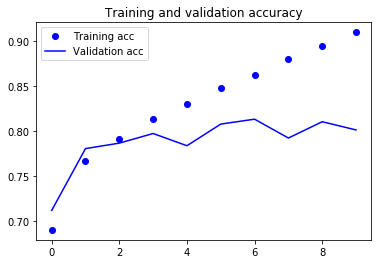

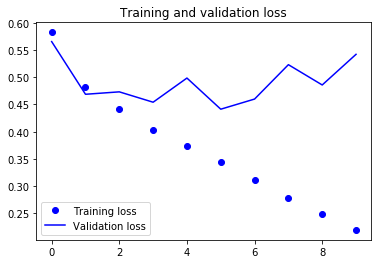

In [25]:
avaliarModelo(model_fit)

## Salvando o modelo

In [28]:
classifier.save('teste_model_10_epochs.h5')
classifier.save_weights('teste_model_10_epochs_weights.h5')



## Lendo um modelo salvo

In [30]:
from keras.models import load_model
model = load_model('teste_model_10_epochs.h5')
wei = model.load_weights('teste_model_10_epochs_weights.h5')


## Testando o modelo preditivo

In [32]:
from keras.preprocessing import image
import numpy as np
img = image.load_img("oliver_2.jpg", target_size = (64, 64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.
# Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

(1, 64, 64, 3)


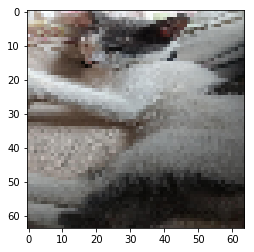

In [33]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

In [34]:
training_set.class_indices

#The subdirectory “cats” comes before “dogs“, therefore the class labels are assigned the integers: cat=0, dog=1.

{'cats': 0, 'dogs': 1}

In [35]:
prediction = classifier.predict(img_tensor)
if prediction[0][0] >=0.5:
    print("It is a dog: ")
else:
    print("It is a cat: ")
print(prediction)

It is a cat: 
[[0.00704071]]


# Aplicação na saúde

https://ieee-dataport.org/open-access/indian-diabetic-retinopathy-image-dataset-idrid

https://www.cancerimagingarchive.net/


## Métrica também muito utilizada: Curva ROC (Receiver Operating Characteristic)

 <img src="img/exemplo_roc.png" alt="Drawing" style="width: 600px;"/>
 
 Um modelo cujas previsões estão 100% erradas tem uma AUC de 0, enquanto um modelo cujas previsões são 100% corretas tem uma AUC de 1. 

# Parâmetros e conceitos:

### Epoch 
1 epoch é considerado quando TODO o dataset de treinamento passa pela rede 1 vez

### Batch size
Numero de imagens que serão inseridas por interação na rede

(batch_size * Numero de interações) >= dataset

## Exemplo

Dataset de 2000 imagens dividido em batches de 500, então teremos 4 iterations para completar 1 epoch.
